In [1]:
import weaviate
import weaviate.classes as wvc

In [2]:
import os


headers = {
    "X-OpenAI-Api-Key": os.getenv("OpenAIApiKey")
}  # Replace with your OpenAI API key

client = weaviate.connect_to_local(headers=headers)

In [3]:
import numpy as np
collection = client.collections.get("Quotes")
response = collection.query.fetch_objects(
    include_vector=True,
    return_properties=["content"],
    limit=10000
)
client.close()
vectors = []
ids = []
contents  = []
for item in response.objects:
    vectors.append(item.vector['default'])
    ids.append(item.uuid)
    contents.append(item.properties['content'])
vectors = np.array(vectors)

In [4]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(damping=0.95,max_iter=1000).fit(vectors)

In [5]:
cluster_assignments = af.fit_predict(vectors)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

23

In [6]:
import pandas as pd
results_df = pd.DataFrame({
        'object_id': ids,
        'content': contents,
        'cluster': cluster_assignments
})
results_df.to_csv('output_af.csv', index=False)

In [7]:
from sklearn.cluster import AgglomerativeClustering  # 导入AgglomerativeClustering类   
import matplotlib.pyplot as plt  # 导入绘图库  
# 设置聚类数    
n_clusters = 20  # 根据需求设置聚类数    
# 创建AgglomerativeClustering对象并拟合数据    
clustering = AgglomerativeClustering(metric='euclidean', 
                                linkage='ward', 
                                distance_threshold=0,
                                n_clusters=None)
labels = clustering.fit(vectors)  # 获取每个样本点的聚类标签    

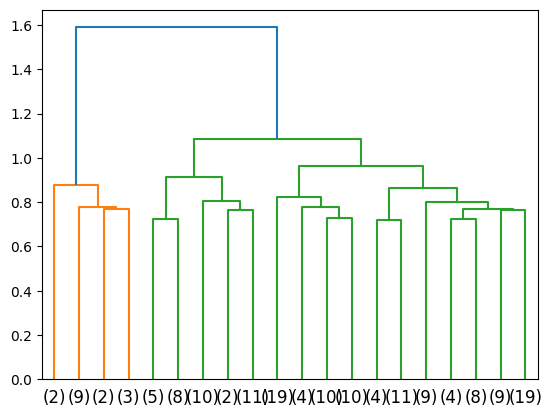

In [8]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            # assert False, merge
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    # assert False, counts

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # assert False, linkage_matrix
    
    return dendrogram(linkage_matrix, **kwargs)['ivl']

result2 = plot_dendrogram(clustering, truncate_mode='lastp', p=20, get_leaves=True)

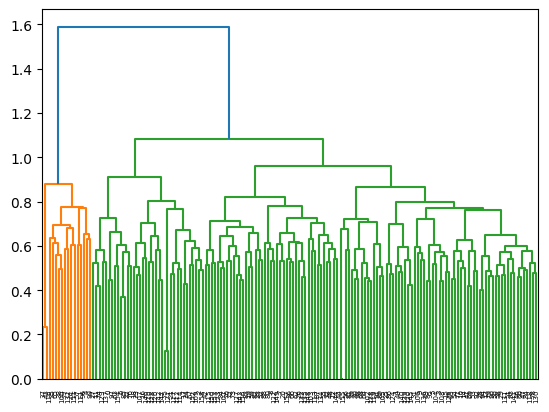

In [9]:
result = plot_dendrogram(clustering, truncate_mode='level', get_leaves=True)

In [10]:
k=0
for count in result2:
    print('---')
    for i in range(0,int(count[1:-1]),1):
        print(contents[int(result[k])])
        k += 1
    print('---')
    

---
The worst vice is advice. Just don’t give out your advices!

The worst vice is advice.

---
---
Guilt is waste of emotion.

Do not pray for an easy life. Pray to be a strong man.

Despair is not an option.

Life is short.

Everything is hard before it’s easy.

Sometimes we all need to learn to love ourselves, believe in ourselves just like Cartman did.

I guess it’s just practices make perfect and I just need more practice.

wanderlust：a strong desire to travel

words sometimes have power. incantation. Another point of view.

---
---
in it. Don’t glass onion~It’s hard to say which has more ego. The old compared to the new. Anyway, saying things means ego in it.

Removed the Visual Identification because: 1. I am not good at drawing. 2. it is not appropriate for all circumstances. 3. there’s too much ego

---
---
James： The Pluralistic Universe， P．13-14）

Remember this: there’re great a lot of people smarter than me, well-educated than me, etc. If a problem is so severe that will de